Name: Hatim Sawai  
UID: 2021300108  
Batch: A  

## <p style="text-align:center;font-weight:500;">Experiment 1</p>
Aim:  
1. Install NLTK and perform basic Corpus analysis using NLTK such as frequency
distribution  
2. Learn about morphological features of a word by analysing it.  

### 1. Installig NLTK and downloading the required corpus

In [1]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from prettytable import PrettyTable

In [2]:
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hatim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hatim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hatim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2. Morphological analysis of a words

In [3]:
pos_mapping = {
    "CC": "Coordinating conjunction",
    "CD": "Cardinal number",
    "DT": "Determiner",
    "EX": "Existential there",
    "FW": "Foreign word",
    "IN": "Preposition or subordinating conjunction",
    "JJ": "Adjective",
    "JJR": "Adjective, comparative",
    "JJS": "Adjective, superlative",
    "LS": "List item marker",
    "MD": "Modal",
    "NN": "noun, singular or mass",
    "NNS": "noun, plural",
    "NNP": "Proper noun, singular",
    "NNPS": "Proper noun, plural",
    "PDT": "Predeterminer",
    "POS": "Possessive ending",
    "PRP": "Personal pronoun",
    "PRP$": "Possessive pronoun",
    "RB": "Adverb",
    "RBR": "Adverb, comparative",
    "RBS": "Adverb, superlative",
    "RP": "Particle",
    "SYM": "Symbol",
    "TO": "to",
    "UH": "Interjection",
    "VB": "Verb, base form",
    "VBD": "Verb, past tense",
    "VBG": "Verb, gerund or present participle",
    "VBN": "Verb, past participle",
    "VBP": "Verb, non­3rd person singular present",
    "VBZ": "Verb, 3rd person singular present",
    "WDT": "Wh­determiner",
    "WP": "Wh­pronoun",
    "WP$": "Possessive wh­pronoun",
    "WRB": "Wh­adverb",
}

def get_wordnet_pos(tag):
    if tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("R"):
        return wordnet.ADV
    elif tag.startswith("J"):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

def get_category(tag):
    if tag.startswith("N"):
        return "Noun"
    elif tag.startswith("V"):
        return "Verb"
    elif tag.startswith("R"):
        return "Adverb"
    elif tag.startswith("J"):
        return "Adjective"
    else:
        return "Noun"

In [4]:
def analyze_sentence(sentence):
    words = word_tokenize(sentence)
    tags = pos_tag(words)
    maleWords = [
        "he",
        "him",
        "his",
        "himself",
        "boy",
        "sir",
        "man",
        "gentleman",
        "father",
        "son",
        "brother",
        "uncle",
        "nephew",
        "grandfather",
        "grandson",
        "king",
        "prince",
        "husband",
        "groom",
    ]
    femaleWords = [
        "she",
        "her",
        "hers",
        "hersef",
        "girl",
        "madam",
        "lady",
        "woman",
        "mother",
        "daughter",
        "sister",
        "aunt",
        "niece",
        "grandmother",
        "granddaughter",
        "queen",
        "princess",
        "wife",
        "bride",
        "widow",
    ]
    lemmatizer = WordNetLemmatizer()
    morphological_table = PrettyTable()
    morphological_table.field_names = ["Root", "Category", "Gender", "Number", "Tense"]
    print(f"\nSentence: {sentence}")
    for i in range(len(words)):
        root = lemmatizer.lemmatize(words[i], get_wordnet_pos(tags[i][1]))
        category = pos_mapping[tags[i][1]] if tags[i][1] in pos_mapping else tags[i][1]
        if words[i].lower() in maleWords:
            gender = "male"
        elif words[i].lower() in femaleWords:
            gender = "female"
        # check if word is a pronoun
        elif "Proper noun" in category and (
            words[i].endswith("i")
            or words[i].endswith("a")
            or words[i].endswith("e")
            or words[i].endswith("y")
        ):
            gender = "female"
        elif "Proper noun" in category:
            gender = "male"
        elif "pronoun" in category:
            gender = "Can't Assume"
        else:
            gender = "neutral"
        # find frequency of word in corpus
        number = sentence.count(words[i])

        # check if word is a verb
        if tags[i][1].startswith("V"):
            # determine tense of the verb
            if (
                words[i].endswith("ed")
                or words[i - 1].lower() == "had"
                or words[i - 1].lower() == "was"
                or words[i - 1].lower() == "were"
            ):
                tense = "past"
            elif (
                words[i].endswith("ing")
                or words[i].endswith("s")
                or words[i - 1].lower() == "is"
                or words[i - 1].lower() == "are"
            ):
                tense = "present"
            elif words[i - 1].lower() == "will" or words[i - 1].lower() == "shall":
                tense = "future"
            else:
                tense = "present"
        else:
            tense = "NA"

        # print(f"Root: {root}, Category: {category}, Gender: {gender}, Number: {number}, Tense: {tense}")
        morphological_table.add_row([root, category, gender, number, tense])
    print(morphological_table)

### 3. Reading a text file and Tokenizination

In [5]:
# read input file
with open("input.txt", "r") as f:
    text = f.read()

# tokenise sentences
sentences = sent_tokenize(text)

In [6]:
# Analyze each sentence
for sentence in sentences:
    analyze_sentence(sentence)


Sentence: The quick brown fox jumps over The lazy dog.


+-------+------------------------------------------+---------+--------+---------+
|  Root |                 Category                 |  Gender | Number |  Tense  |
+-------+------------------------------------------+---------+--------+---------+
|  The  |                Determiner                | neutral |   2    |    NA   |
| quick |                Adjective                 | neutral |   1    |    NA   |
| brown |          noun, singular or mass          | neutral |   1    |    NA   |
|  fox  |          noun, singular or mass          | neutral |   1    |    NA   |
|  jump |    Verb, 3rd person singular present     | neutral |   1    | present |
|  over | Preposition or subordinating conjunction | neutral |   1    |    NA   |
|  The  |                Determiner                | neutral |   2    |    NA   |
|  lazy |                Adjective                 | neutral |   1    |    NA   |
|  dog  |          noun, singular or mass          | neutral |   1    |    NA   |
|   .   |       

### 4. Performing frequency distribution on the tokens

        The           .         dog         and          of           a       quick       brown         fox       jumps        over        lazy         She       plays       piano beautifully         sun        sets          in        west       every     evening        John        Mary         are       going          to       beach    tomorrow   delicious       aroma     freshly       baked       bread       fills         air         old     library          is       quiet    peaceful       place    students     eagerly       await     results       their       exams      chased     playful         cat      around        room          We     enjoyed    relaxing    vacation          on    tropical      island           I          am       Hatim           ,      taking        this         NLP      course      taught          by       Reeta         mam 
         15          10           2           2           2           2           1           1           1           1           1    

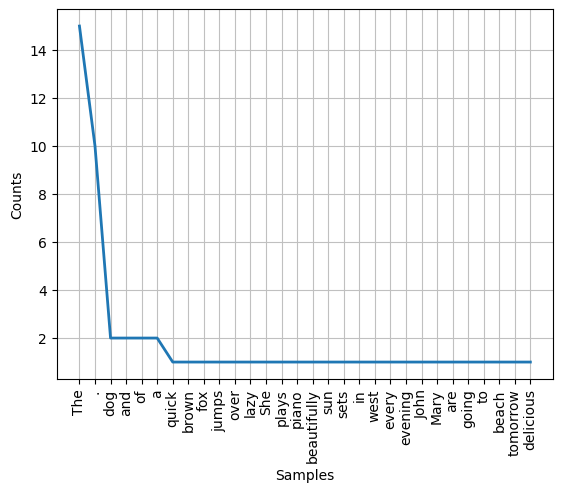

<Axes: xlabel='Samples', ylabel='Counts'>

In [7]:
tokens = word_tokenize(text)
fdist = FreqDist(tokens)
freq_table = fdist.tabulate()
# Display frequency distribution as a bar graph
fdist.plot(30, cumulative=False)

### 5. Curiosity Questions
<p style="font-weight:500;">Q1. What is Natural language processing? Discuss various levels of analysis under it?</p>
Ans: NLP bridges the gap between human language and the digital world. It's like giving computers the ears and brain to understand and respond to spoken and written language, mimicking how humans communicate.  

Levels of NLP analysis progressively dig deeper into the meaning:  

- Morphological analysis: Breaks down words into their smallest meaningful units (morphemes), like "un-happy" into "un-" (negation) and "happy" (root word).  
- Syntactic analysis: Examines the structure of sentences, identifying parts of speech and their relationships. For example, recognizing "The dog chased the cat" as Subject-Verb-Object structure.  
- Semantic analysis: Deals with the meaning of words and sentences, including context and relationships between words. Understanding that "bark" can refer to sound, tree part, or a team's performance depending on context.  
- Pragmatic analysis: Considers the speaker's intent and the context in which language is used. Knowing that "It's cold" might be a statement, a request for warmth, or sarcasm depending on the situation.  

<p style="font-weight:500;">Q2. What do you mean by ambiguity in NLP? Discuss various ways to resolve ambiguity in NLP.</p>  
Ans: Ambiguity in NLP refers to the presence of multiple possible interpretations of a word, phrase, or sentence. This can hinder the ability of machines to understand the true meaning.  

Ways to resolve ambiguity:  
- Context analysis: Using surrounding information to determine the intended meaning.  
- Part-of-speech tagging: Identifying the grammatical roles of words (e.g., noun, verb) to understand their function.  
- Word sense disambiguation: Determining the specific meaning of a word based on context and usage.  
- ML algorithms: Trained on large datasets of text, these algorithms can statistically predict the most likely meaning in ambiguous situations.  

<p style="font-weight:500;">Q3. What is morphology with examples? </p>    
Ans: Morphology is the branch of linguistics that studies the internal structure of words, focusing on how morphemes combine to form meaningful units.  

Examples:  
"Unhappy" is composed of "un-" (prefix meaning negation) and "happy" (root).  
"Books" is the plural form of "book" by adding the suffix "-s".  
"Teacher" combines the root "teach" with the suffix "-er" to indicate someone who does the action of teaching.  

Uses of Morphology in NLP:  
- Stemming and lemmatization: reducing words to their base form for better indexing and comparison.
- Part-of-speech tagging: identifying the grammatical function of words based on their morphological features.
- Spelling correction: suggesting correct spellings by analyzing possible morpheme combinations.

### 6. Conclusion
In this experiment we learnt about the basic corpus analysis using NLTK and also learnt about the morphological features of a word. We also learnt about the tokenizination of a text file and performing frequency distribution on the tokens.